In [1]:
import torch
import torch.utils.data

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import random

In [4]:
from map_class import MapClass

In [5]:
#Training inputs for RGBcolors
rgb_colors = [[0., 0., 0.],
      [0., 0., 1.],
      [0., 0., 0.5],
      [0.125, 0.529, 1.0],
      [0.33, 0.4, 0.67],
      [0.6, 0.5, 1.0],
      [0., 1., 0.],
      [1., 0., 0.],
      [0., 1., 1.],
      [1., 0., 1.],
      [1., 1., 0.],
      [1., 1., 1.],
      [.33, .33, .33],
      [.5, .5, .5],
      [.66, .66, .66]]

In [6]:
color_names = \
    ['black', 'blue', 'darkblue', 'skyblue',
     'greyblue', 'lilac', 'green', 'red',
     'cyan', 'violet', 'yellow', 'white',
     'darkgrey', 'mediumgrey', 'lightgrey']

In [7]:
def create_matrix(amount_vertecies):
    matrix_graph_weights = torch.zeros(amount_vertecies, amount_vertecies)
    for i in range(amount_vertecies):
        matrix_graph_weights[i][i] = 1
        
    return matrix_graph_weights

In [8]:
def add_edge(matrix, length, width, weight):
    if length < matrix.shape[0] and width < matrix.shape[0]:
        matrix[length][width] = weight
        matrix[width][length] = weight
        
    return matrix

In [9]:
def generate_edges(amount_vertecies, percent_edges):
    amount_edges = int((amount_vertecies**2) * percent_edges)
    print(amount_edges)
    edges = []
    for i in range(amount_edges):
        edge = [random.randint(0, amount_vertecies-1), random.randint(0, amount_vertecies-1), random.random()]
        edges.append(edge)
    
    return edges

In [10]:
def add_edges(matrix, edges):
    for edge in edges:
        matrix = add_edge(matrix, edge[0], edge[1], edge[2])
        
    return matrix

In [11]:
# Graph setup

In [12]:
amount_vertecies = 100
percent_edges = 0.5

In [13]:

matrix1 = create_matrix(amount_vertecies)

In [14]:
# matrix1

In [15]:
edges1 = generate_edges(amount_vertecies, percent_edges)

5000


In [16]:
# edges1

In [17]:
matrix1 = add_edges(matrix1, edges1)

In [18]:
# matrix1

In [19]:
# generate_edges(10,0.5)

In [20]:
edges = [[0,1,0.1], [0,3,0.4], [0,20,0.4], [0,30,0.7], [1,3,0.2], [0,4,0.6], [2,3,0.15], [4,5,0.2]]

In [21]:
# Network configuration

data = rgb_colors
batch_size = 4

length = 10
width = 10
number_iterations = 1

learning_rate = 0.5

In [22]:
trainloader = ""

def load_data(data, batch_size=4, shuffle=False):
    dim = len(data[0])
    number_rows_data = len(data)
    
    trainloader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True)
    
    return trainloader, dim, number_rows_data

In [23]:
def large_cycle(map_, training_data):
    basic_visualization(map_display(map_.map))
    print(map_display(map_.map))
    for i in range(number_iterations):
        cycle(map_, training_data)
    basic_visualization(map_display(map_.map))
    print(map_display(map_.map))

In [24]:
def large_cycle_rgb(map_, training_data):
    visualize_rgb(map_)
#     print(map_display(map_.map))
    for i in range(number_iterations):
        map_.cycle(training_data)
    visualize_rgb(map_)
#     print(map_display(map_.map))

In [25]:
def visualize_rgb(map_):
    print("trying to visualize map")
    tens_try = map_.weights.view(length, width, 3)
    plt.imshow(tens_try)

    classification = map_.classify_all(map_.convert_data_tensor(data))
    for i in range(len(classification)):
        loc_tuple = map_.get_location(classification[i])
        plt.text(loc_tuple[1], loc_tuple[0], color_names[i], ha='center', va='center',
        bbox=dict(facecolor='white', alpha=0.5, lw=0))

# plt.text(0, 1, color_names[1], ha='center', va='center',
#          bbox=dict(facecolor='white', alpha=0.5, lw=0))
    plt.show()

In [26]:
training, dim, number_rows_data = load_data(data)

In [27]:
map1 = MapClass(length, width, dim, learning_rate, number_iterations, matrix1)

trying to visualize map


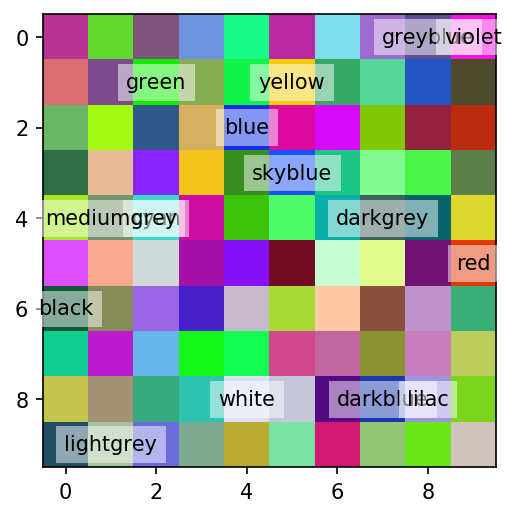

trying to visualize map


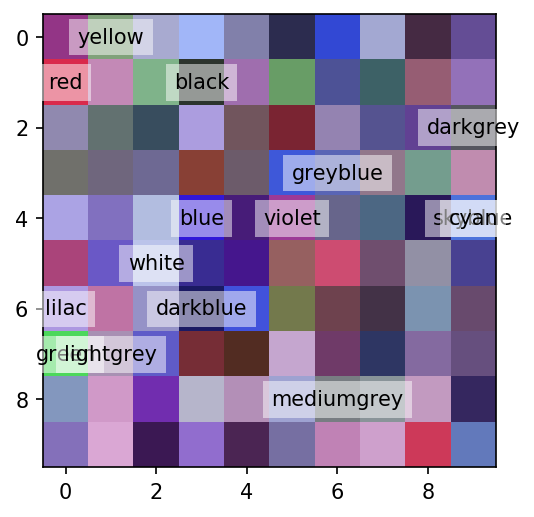

In [28]:
plt.rcParams['figure.dpi'] = 150
large_cycle_rgb(map1, training)

trying to visualize map


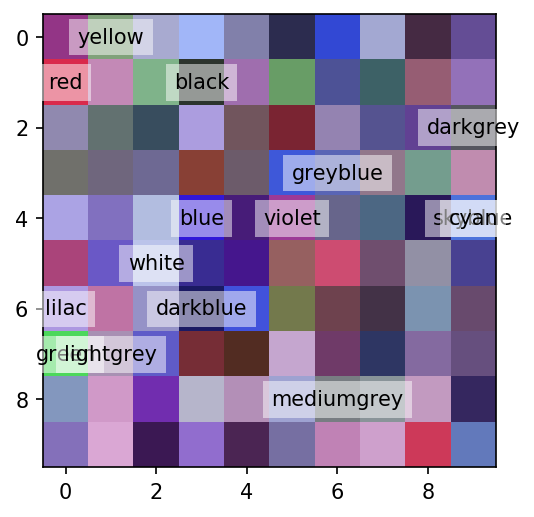

trying to visualize map


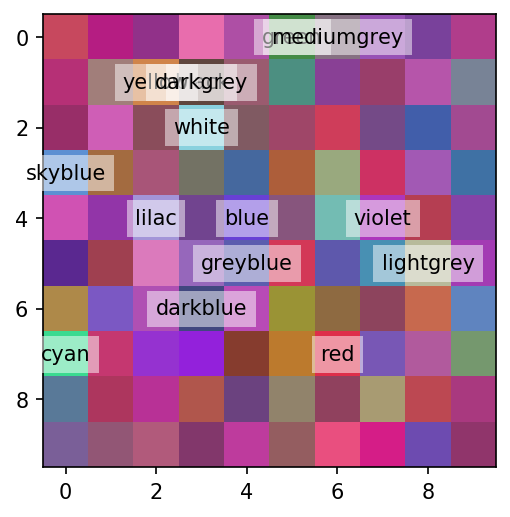

In [29]:
plt.rcParams['figure.dpi'] = 150
large_cycle_rgb(map1, training)

In [30]:
map1.cycle(training)

In [ ]:
visualize_rgb(map1.weights)

In [ ]:

classification

In [ ]:
tens_try = map1.weights.view(length, width, 3)
plt.imshow(tens_try)

classification = map1.classify_all(map1.convert_data_tensor(data))
for i in range(len(classification)):
    loc_tuple = map1.get_location(classification[i])
    plt.text(loc_tuple[1], loc_tuple[0], color_names[i], ha='center', va='center',
         bbox=dict(facecolor='white', alpha=0.5, lw=0))
z
# plt.text(0, 1, color_names[1], ha='center', va='center',
#          bbox=dict(facecolor='white', alpha=0.5, lw=0))
plt.show()

In [ ]:
visualize_rgb(map1)